In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List

from sklearn.cluster import KMeans

from scripts.utils import load_binary_from_eleven_sandstones

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 2.1.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/pedro2/.local/lib/python3.10/site-packages/ipykernel_launcher.py",

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [8]:
data_dir = project_root + "/data"
data_paths = [data for data in os.listdir(data_dir) if data.endswith(".raw")]
data_dict = {name[:-4]: load_binary_from_eleven_sandstones(data_dir + "/" + name) for name in data_paths}
names = list(data_dict.keys())
pd.Series(names)

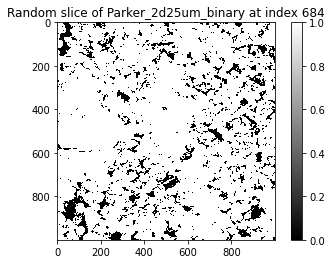

In [5]:
np.random.seed(0)
# plt.figure(figsize=(10, 10))
idx = np.random.randint(0, 1000)
sandstone = names[2]
slice = data_dict[sandstone][:, :, idx]
plt.imshow(slice,cmap="gray", interpolation="nearest")
plt.colorbar()
plt.title(f"Random slice of {sandstone} at index {idx}");

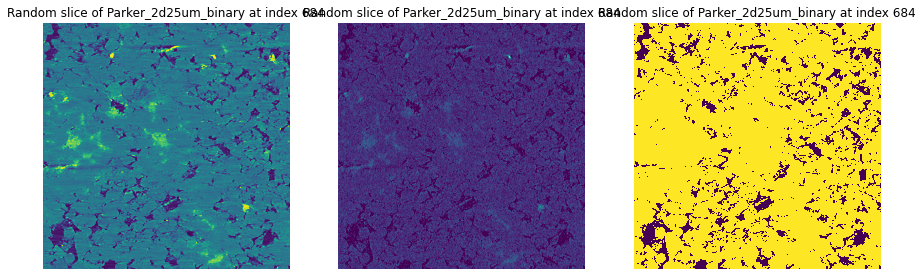

In [6]:
hx = 5
fig, axes = plt.subplots(1, len(names), figsize=(hx*len(names),hx))
for i, name in enumerate(names):
    data = data_dict[name][:, :, idx]
    axes[i].imshow(data, interpolation='nearest')
    axes[i].set_title(f"Random slice of {sandstone} at index {idx}")
    axes[i].axis('off')

In [ ]:
flat = slice.reshape(-1,1)
labels = KMeans(n_clusters=4).fit_predict(flat)
seg2d = labels.reshape(data_dict[sandstone][:, :,idx].shape)
plt.imshow(seg2d)
plt.colorbar()

ModuleNotFoundError: No module named 'sklearn'

(array([570790.,  97319.,  50770., 281121.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

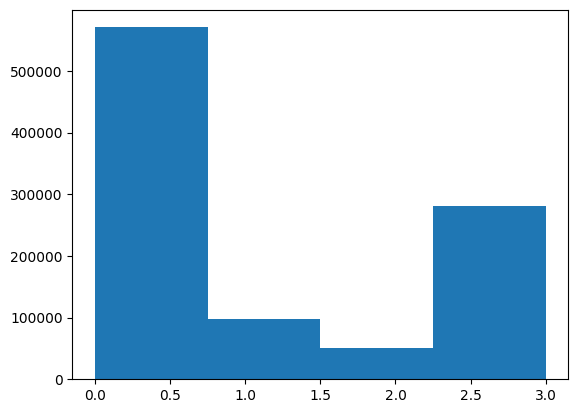

In [ ]:
plt.hist(seg2d.flatten(), bins=4)

In [ ]:
n = 7 # tamanho da janela
l = seg2d.shape[0] # tamanho da imagem
data_events = []
pad = (n-1)//2   # idx_min e idx_max no seu código

for y in range(pad, l-pad):
    for x in range(pad, l-pad):
        patch = seg2d[y-pad:y+pad+1, x-pad:x+pad+1]        # janela n×n
        center = patch[pad, pad]                           # valor central
        neigh_flat = np.delete(patch.flatten(), pad*n+pad) # remove o centro
        data_events.append((tuple(neigh_flat), int(center)))

In [ ]:
counts = {}
for pattern, u in data_events:
    counts[pattern][u] += 1

cpdf = {}
for pattern, ctr_dict in counts.items():
    total = sum(ctr_dict.values())
    probs = {u: cnt/total for u, cnt in ctr_dict.items()}
    cpdf[pattern] = probs

In [ ]:
q = []
for i in cpdf[2].keys():
    q.append(cpdf[2][i])
q = np.array(q)

In [ ]:
cpdf[2].__len__() # 4 classes
cpdf[2].__class__ # 4 classes

y = 0
key = list(cpdf[2].keys())[y]

In [ ]:
x = 2
print(f"cpdf.__class__: {cpdf.__class__}")
print(f"cpdf.keys(): {cpdf.keys()}")
print(f"cpdf[{x}].__class__: {cpdf[x].__class__}")
print(f"cpdf[{x}].__len__(): {cpdf[x].__len__()}")

cpdf.__class__: <class 'dict'>
cpdf.keys(): dict_keys([2, 0, 3, 1])
cpdf[2].__class__: <class 'dict'>
cpdf[2].__len__(): 595472


In [ ]:
seg2d

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

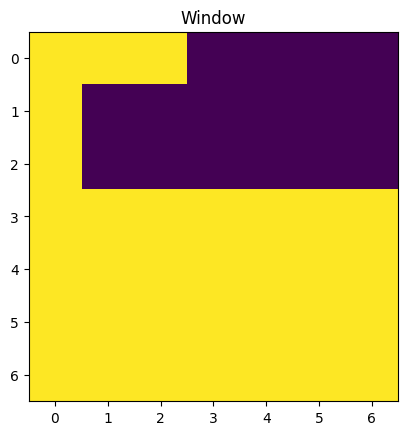

In [ ]:
np.random.seed(0)
l = slice.shape[0]
n = 7
idx_min, idx_max = int((n-1)/2), int(l - (n-1)/2)
i,j = np.random.randint(idx_min, idx_max, size=2)
window_n = seg2d[i - idx_min:i + idx_min + 1, j - idx_min:j + idx_min + 1].copy()
plt.imshow(window_n)
plt.title('Window')

In [ ]:
center = int((n-1)/2)
window_n[center, center]

3